In [13]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('max_columns', None)

In [4]:
DATA_PATH = "../../Data/STRUCTURED_DATA/DATA_CEA/all_cea_data.csv"

In [5]:
df = pd.read_csv(DATA_PATH)

In [6]:
df.head()

,id_pat,date,activity,timeline,Avant_pied_droit_appui,Medio_pied_droit_appui,Arriere_pied_droit_appui,Avant_pied_gauche_appui,Medio_pied_gauche_appui,Arriere_pied_gauche_appui,Semelle_Droite_Capt_1,Semelle_Droite_Capt_2,Semelle_Droite_Capt_3,Semelle_Droite_Capt_4,Semelle_Droite_Capt_5,Semelle_Droite_Capt_6,Semelle_Droite_Capt_7,Semelle_Droite_Capt_8,Semelle_Droite_Capt_9,Semelle_Droite_Capt_10,Semelle_Gauche_Capt_1,Semelle_Gauche_Capt_2,Semelle_Gauche_Capt_3,Semelle_Gauche_Capt_4,Semelle_Gauche_Capt_5,Semelle_Gauche_Capt_6,Semelle_Gauche_Capt_7,Semelle_Gauche_Capt_8,Semelle_Gauche_Capt_9,Semelle_Gauche_Capt_10,Te,CI_Droit_qui_se_leve,CI_Droit_qui_se_pose,CI_Gauche_qui_se_leve,CI_Gauche_qui_se_pose,Acc_x_G,Acc_y_G,Acc_z_G,Gyro_x_G,Gyro_y_G,Gyro_z_G,Acc_x_D,Acc_y_D,Acc_z_D,Gyro_x_D,Gyro_y_D,Gyro_z_D
0,P01,2019-05-07,2minBassin,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,49.0,19.0,18.0,34.0,30.0,34.0,40.0,19.0,63.0,11.0,5.0,7.0,12.0,45.0,30.0,17.0,11.0,15.0,11.0,15.0,0.025575,0.0,0.0,0.0,0.0,2.50,-9.38,0.25,-0.025089,-0.001091,0.021817,-0.12,-9.38,2.67,-0.002182,-0.005454,-0.001091
1,P01,2019-05-07,2minBassin,0.025575,1.0,0.0,0.0,0.0,1.0,0.0,49.0,19.0,18.0,34.0,30.0,34.0,40.0,19.0,62.0,11.0,5.0,7.0,12.0,45.0,30.0,17.0,10.0,15.0,11.0,15.0,0.025575,0.0,0.0,0.0,0.0,2.43,-9.51,0.34,-0.013090,-0.021817,0.005454,-0.15,-9.37,2.66,-0.001091,-0.001091,-0.004363
2,P01,2019-05-07,2minBassin,0.051151,1.0,0.0,0.0,0.0,1.0,0.0,50.0,19.0,18.0,34.0,30.0,34.0,40.0,19.0,62.0,11.0,5.0,7.0,12.0,45.0,30.0,17.0,10.0,15.0,11.0,15.0,0.025575,0.0,0.0,0.0,0.0,2.15,-9.62,0.51,-0.001091,-0.018544,0.007636,-0.12,-9.37,2.67,-0.002182,-0.005454,-0.003272
3,P01,2019-05-07,2minBassin,0.076726,1.0,0.0,0.0,0.0,1.0,0.0,49.0,19.0,18.0,33.0,30.0,34.0,40.0,19.0,62.0,11.0,5.0,7.0,12.0,45.0,31.0,17.0,11.0,15.0,11.0,15.0,0.025575,0.0,0.0,0.0,0.0,2.20,-9.63,0.62,-0.014181,0.011999,-0.003272,-0.13,-9.36,2.67,-0.002182,-0.005454,-0.002182
4,P01,2019-05-07,2minBassin,0.102302,1.0,0.0,0.0,0.0,1.0,0.0,50.0,19.0,18.0,34.0,30.0,34.0,40.0,19.0,63.0,11.0,5.0,7.0,13.0,46.0,31.0,17.0,11.0,15.0,11.0,15.0,0.025575,0.0,0.0,0.0,0.0,2.20,-9.51,0.93,-0.085085,0.078540,-0.041452,-0.11,-9.37,2.64,-0.003272,-0.001091,0.000000


# DATA Exploration

In [7]:
act_cols = ['CI_Droit_qui_se_leve', 'CI_Droit_qui_se_pose', 'CI_Gauche_qui_se_leve', 'CI_Gauche_qui_se_pose']

In [8]:
df[act_cols].nunique()

CI_Droit_qui_se_leve     2
CI_Droit_qui_se_pose     2
CI_Gauche_qui_se_leve    2
CI_Gauche_qui_se_pose    2
dtype: int64

In [9]:
tst_df = df[(df.id_pat=='P01') & (df.activity=='2minBassin')]
tst_df

,id_pat,date,activity,timeline,Avant_pied_droit_appui,Medio_pied_droit_appui,Arriere_pied_droit_appui,Avant_pied_gauche_appui,Medio_pied_gauche_appui,Arriere_pied_gauche_appui,Semelle_Droite_Capt_1,Semelle_Droite_Capt_2,Semelle_Droite_Capt_3,Semelle_Droite_Capt_4,Semelle_Droite_Capt_5,Semelle_Droite_Capt_6,Semelle_Droite_Capt_7,Semelle_Droite_Capt_8,Semelle_Droite_Capt_9,Semelle_Droite_Capt_10,Semelle_Gauche_Capt_1,Semelle_Gauche_Capt_2,Semelle_Gauche_Capt_3,Semelle_Gauche_Capt_4,Semelle_Gauche_Capt_5,Semelle_Gauche_Capt_6,Semelle_Gauche_Capt_7,Semelle_Gauche_Capt_8,Semelle_Gauche_Capt_9,Semelle_Gauche_Capt_10,Te,CI_Droit_qui_se_leve,CI_Droit_qui_se_pose,CI_Gauche_qui_se_leve,CI_Gauche_qui_se_pose,Acc_x_G,Acc_y_G,Acc_z_G,Gyro_x_G,Gyro_y_G,Gyro_z_G,Acc_x_D,Acc_y_D,Acc_z_D,Gyro_x_D,Gyro_y_D,Gyro_z_D
0,P01,2019-05-07,2minBassin,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,49.0,19.0,18.0,34.0,30.0,34.0,40.0,19.0,63.0,11.0,5.0,7.0,12.0,45.0,30.0,17.0,11.0,15.0,11.0,15.0,0.025575,0.0,0.0,0.0,0.0,2.50,-9.38,0.25,-0.025089,-0.001091,0.021817,-0.12,-9.38,2.67,-0.002182,-0.005454,-0.001091
1,P01,2019-05-07,2minBassin,0.025575,1.0,0.0,0.0,0.0,1.0,0.0,49.0,19.0,18.0,34.0,30.0,34.0,40.0,19.0,62.0,11.0,5.0,7.0,12.0,45.0,30.0,17.0,10.0,15.0,11.0,15.0,0.025575,0.0,0.0,0.0,0.0,2.43,-9.51,0.34,-0.013090,-0.021817,0.005454,-0.15,-9.37,2.66,-0.001091,-0.001091,-0.004363
2,P01,2019-05-07,2minBassin,0.051151,1.0,0.0,0.0,0.0,1.0,0.0,50.0,19.0,18.0,34.0,30.0,34.0,40.0,19.0,62.0,11.0,5.0,7.0,12.0,45.0,30.0,17.0,10.0,15.0,11.0,15.0,0.025575,0.0,0.0,0.0,0.0,2.15,-9.62,0.51,-0.001091,-0.018544,0.007636,-0.12,-9.37,2.67,-0.002182,-0.005454,-0.003272
3,P01,2019-05-07,2minBassin,0.076726,1.0,0.0,0.0,0.0,1.0,0.0,49.0,19.0,18.0,33.0,30.0,34.0,40.0,19.0,62.0,11.0,5.0,7.0,12.0,45.0,31.0,17.0,11.0,15.0,11.0,15.0,0.025575,0.0,0.0,0.0,0.0,2.20,-9.63,0.62,-0.014181,0.011999,-0.003272,-0.13,-9.36,2.67,-0.002182,-0.005454,-0.002182
4,P01,2019-05-07,2minBassin,0.102302,1.0,0.0,0.0,0.0,1.0,0.0,50.0,19.0,18.0,34.0,30.0,34.0,40.0,19.0,63.0,11.0,5.0,7.0,13.0,46.0,31.0,17.0,11.0,15.0,11.0,15.0,0.025575,0.0,0.0,0.0,0.0,2.20,-9.51,0.93,-0.085085,0.078540,-0.041452,-0.11,-9.37,2.64,-0.003272,-0.001091,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,P01,2019-05-07,2minBassin,158.286445,0.0,0.0,0.0,0.0,1.0,0.0,47.0,14.0,11.0,20.0,20.0,22.0,38.0,12.0,63.0,8.0,6.0,10.0,30.0,59.0,32.0,18.0,12.0,16.0,7.0,11.0,0.025575,0.0,0.0,0.0,0.0,2.90,-9.37,-0.10,-0.003272,0.001091,0.009817,-0.24,-9.31,3.09,0.079631,0.167988,-0.009817
6190,P01,2019-05-07,2minBassin,158.312020,0.0,0.0,0.0,0.0,1.0,0.0,47.0,13.0,11.0,19.0,20.0,22.0,38.0,12.0,63.0,9.0,6.0,11.0,30.0,58.0,33.0,18.0,12.0,16.0,7.0,11.0,0.025575,0.0,0.0,0.0,0.0,2.91,-9.36,-0.10,-0.001091,0.002182,0.011999,-0.32,-9.28,2.99,0.037088,0.032725,-0.025089
6191,P01,2019-05-07,2minBassin,158.337596,0.0,0.0,0.0,0.0,1.0,0.0,47.0,13.0,11.0,18.0,19.0,22.0,38.0,13.0,63.0,8.0,6.0,11.0,30.0,58.0,33.0,18.0,12.0,16.0,7.0,11.0,0.025575,0.0,0.0,0.0,0.0,2.87,-9.35,-0.08,0.000000,0.005454,0.006545,-0.19,-9.46,3.06,0.099266,0.010908,-0.016362
6192,P01,2019-05-07,2minBassin,158.363171,0.0,0.0,0.0,0.0,1.0,0.0,46.0,13.0,10.0,19.0,19.0,22.0,38.0,12.0,63.0,8.0,6.0,11.0,30.0,58.0,33.0,18.0,12.0,16.0,7.0,11.0,0.025575,0.0,0.0,0.0,0.0,2.87,-9.39,-0.10,0.002182,-0.010908,0.002182,-0.19,-9.36,3.06,0.139626,0.052360,-0.003272


In [10]:
iter_df = df[['id_pat', 'activity']].groupby(['id_pat', 'activity']).count().reset_index()

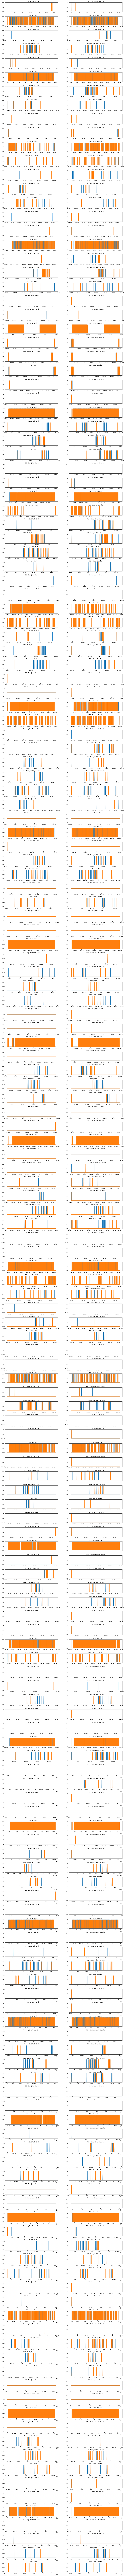

In [11]:
fig, axs = plt.subplots(184,2, figsize=(20,450))
fig.subplots_adjust(hspace=.5)

for idx, row in iter_df.iterrows():
    temp_df = df[(df.id_pat==row['id_pat']) & (df.activity==row['activity'])]
    axs[idx,0].plot(temp_df.CI_Droit_qui_se_leve, label='leve')
    axs[idx,0].plot(temp_df.CI_Droit_qui_se_pose, label='pose')
    axs[idx,1].plot(temp_df.CI_Gauche_qui_se_leve, label='leve')
    axs[idx,1].plot(temp_df.CI_Gauche_qui_se_pose, label='pose')
    axs[idx,0].set_title(row['id_pat'] + ' - ' + row['activity'] + ' - ' + 'Droit')
    axs[idx,1].set_title(row['id_pat'] + ' - ' + row['activity'] + ' - ' + 'Gauche')
    

<AxesSubplot:>

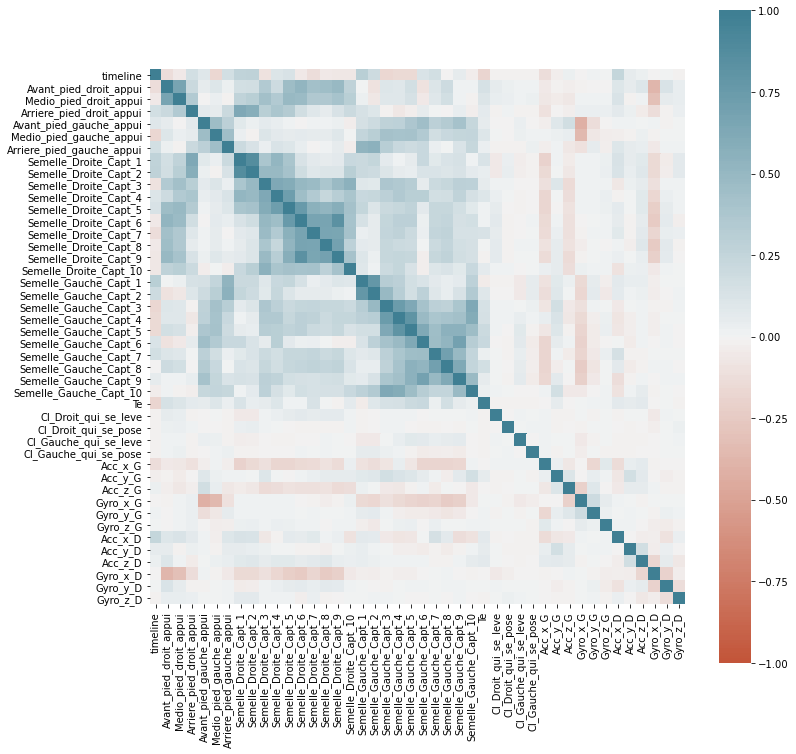

In [15]:
corr = df.corr()
fig = plt.figure(figsize=(12,12))
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

# DATA Processing

In [21]:
train_cols = [col for col in df.columns if col.startswith(('Acc', 'Gyro'))]
target_cols = [col for col in df.columns if col.startswith('CI')]

In [37]:
df.shape

(1232293, 47)

In [40]:
train_df = df[train_cols+target_cols]

In [41]:
train_df.isna().sum()

Acc_x_G                  122711
Acc_y_G                  122711
Acc_z_G                  122711
Gyro_x_G                 122711
Gyro_y_G                 122711
Gyro_z_G                 122711
Acc_x_D                  122711
Acc_y_D                  122711
Acc_z_D                  122711
Gyro_x_D                 122711
Gyro_y_D                 122711
Gyro_z_D                 122711
CI_Droit_qui_se_leve          0
CI_Droit_qui_se_pose          0
CI_Gauche_qui_se_leve         0
CI_Gauche_qui_se_pose         0
dtype: int64

In [47]:
train_df = train_df.dropna()

In [48]:
print(train_df.shape)

(1109582, 16)


In [49]:
X = train_df[train_cols]
y = train_df[target_cols]

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [53]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(776707, 12) (332875, 12) (776707, 4) (332875, 4)


In [54]:
print(y_train.sum() / y_train.shape[0] * 100)
print(y_test.sum() / y_test.shape[0] * 100)

CI_Droit_qui_se_leve     0.796311
CI_Droit_qui_se_pose     0.792062
CI_Gauche_qui_se_leve    0.801461
CI_Gauche_qui_se_pose    0.803392
dtype: float64
CI_Droit_qui_se_leve     0.784379
CI_Droit_qui_se_pose     0.794292
CI_Gauche_qui_se_leve    0.805107
CI_Gauche_qui_se_pose    0.800601
dtype: float64


# Train models

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn import model_selection
from sklearn.utils import class_weight

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.multioutput import MultiOutputClassifier

In [ ]:
dfs = []
models = [
    ('LogReg', MultiOutputClassifier(LogisticRegression())),
    ('RF', MultiOutputClassifier(RandomForestClassifier())),
    ('KNN', MultiOutputClassifier(KNeighborsClassifier())),
    ('SVM', MultiOutputClassifier(SVC())),
    ('GNB', MultiOutputClassifier(GaussianNB())),
    ('XGB', MultiOutputClassifier(XGBClassifier()))
]

results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_cols))
    
    results.append(cv_results)
    names.append(name)
    
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    
results = pd.concat(dfs, ignore_index=True)

C:\Users\youne\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\youne\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\youne\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogReg


C:\Users\youne\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\youne\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                       precision    recall  f1-score   support

 CI_Droit_qui_se_leve       0.00      0.00      0.00      2611
 CI_Droit_qui_se_pose       0.00      0.00      0.00      2644
CI_Gauche_qui_se_leve       0.00      0.00      0.00      2680
CI_Gauche_qui_se_pose       0.00      0.00      0.00      2665

            micro avg       0.00      0.00      0.00     10600
            macro avg       0.00      0.00      0.00     10600
         weighted avg       0.00      0.00      0.00     10600
          samples avg       0.00      0.00      0.00     10600

RF


C:\Users\youne\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\youne\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                       precision    recall  f1-score   support

 CI_Droit_qui_se_leve       0.79      0.12      0.21      2611
 CI_Droit_qui_se_pose       0.77      0.07      0.13      2644
CI_Gauche_qui_se_leve       0.81      0.15      0.26      2680
CI_Gauche_qui_se_pose       0.81      0.07      0.13      2665

            micro avg       0.79      0.10      0.18     10600
            macro avg       0.79      0.10      0.18     10600
         weighted avg       0.79      0.10      0.18     10600
          samples avg       0.00      0.00      0.00     10600

KNN


C:\Users\youne\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\youne\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                       precision    recall  f1-score   support

 CI_Droit_qui_se_leve       0.37      0.08      0.14      2611
 CI_Droit_qui_se_pose       0.45      0.11      0.17      2644
CI_Gauche_qui_se_leve       0.37      0.08      0.13      2680
CI_Gauche_qui_se_pose       0.42      0.08      0.14      2665

            micro avg       0.41      0.09      0.14     10600
            macro avg       0.40      0.09      0.14     10600
         weighted avg       0.40      0.09      0.14     10600
          samples avg       0.00      0.00      0.00     10600



In [ ]:
#unique, counts = np.unique(clf.predict(X_test), return_counts=True)
#dict(zip(unique, counts))

# Create lagged columns

In [ ]:
X_train_lagged = pd.concat([[X_train[col].shift(lag).rename('{}_lag{}'.format(col, lag+1)) for lag in range(3)] for col in train_cols], axis=1).dropna()
X_test_lagged = pd.concat([[X_test[col].shift(lag).rename('{}_lag{}'.format(col, lag+1)) for lag in range(3)] for col in train_cols], axis=1).dropna()